## Vorwort

Dieses Projekt ist auch unter dem Github-Repository https://github.com/Denti1848/SciPro_2023_FS/ verfügbar.

## Vorbereitung der Daten

In [31]:
# Libraries importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries für Monte Carlo Simulation 2. Möglichkeit
import pandas_datareader as web
import yfinance as yf
from datetime import datetime

In [2]:
# CSV file lesen
df = pd.read_csv("SMI Daten.csv", index_col=0) # CSV-Datein einlesen, Index-Kolone wird auf das Datum gesetzt
df

,Zuletzt,Eröffn.,Hoch,Tief,Vol.,Rendite
Datum,,,,,,
01.03.2022,"12.161,53","11.987,44","12.388,79","10.871,24","1,44B","1,46%"
01.02.2022,"11.986,78","12.338,54","12.422,95","11.480,76","1,06B","-1,96%"
01.01.2022,"12.226,70","12.934,42","12.997,15","11.867,78","918,37M","-5,04%"
01.12.2021,"12.875,66","12.207,76","12.980,14","12.093,37","743,35M","5,89%"
01.11.2021,"12.159,69","12.174,92","12.625,81","12.071,67","898,16M","0,43%"
01.10.2021,"12.108,17","11.491,08","12.153,10","11.381,74","714,40M","4,00%"
01.09.2021,"11.642,45","12.472,04","12.491,18","11.465,59","882,50M","-6,19%"
01.08.2021,"12.411,11","12.165,21","12.573,43","12.124,36","665,34M","2,43%"
01.07.2021,"12.116,82","11.993,98","12.146,68","11.799,23","767,21M","1,46%"


In [3]:
df["Zuletzt"] = df["Zuletzt"].str.replace(".", "").str.replace(",", ".").astype(float)
df["Eröffn."] = df["Eröffn."].str.replace(".", "").str.replace(",", ".").astype(float)
df["Hoch"] = df["Hoch"].str.replace(".", "").str.replace(",", ".").astype(float)
df["Tief"] = df["Tief"].str.replace(".", "").str.replace(",", ".").astype(float)
df["Rendite"] = df["Rendite"].str.replace(",", ".").str.strip("%").astype(float)

In [4]:
df

,Zuletzt,Eröffn.,Hoch,Tief,Vol.,Rendite
Datum,,,,,,
01.03.2022,12161.53,11987.44,12388.79,10871.24,"1,44B",1.46
01.02.2022,11986.78,12338.54,12422.95,11480.76,"1,06B",-1.96
01.01.2022,12226.70,12934.42,12997.15,11867.78,"918,37M",-5.04
01.12.2021,12875.66,12207.76,12980.14,12093.37,"743,35M",5.89
01.11.2021,12159.69,12174.92,12625.81,12071.67,"898,16M",0.43
01.10.2021,12108.17,11491.08,12153.10,11381.74,"714,40M",4.00
01.09.2021,11642.45,12472.04,12491.18,11465.59,"882,50M",-6.19
01.08.2021,12411.11,12165.21,12573.43,12124.36,"665,34M",2.43
01.07.2021,12116.82,11993.98,12146.68,11799.23,"767,21M",1.46


Da im CSV-File Tausender-Trennung mit Punkten und die Dezimalstellen mit Kommas gemacht wurde, können die Einträge nur als String und nicht als Float interpretiert werden. Daher muss bei den einzelnen Spalten der Tausender-Punkt gelöscht und das Dezimal-Komma durch einen Dezimal-Punkt ersetzt werden. Dies erfolgt mit der Funktion replace(). Ebenfalls muss das Prozentzeichen gelöscht werden. Dies wird mit der Funktion strip() gemacht. Anschliessend werden die Einträge mit der Funktion astype() als Floats definiert.

In [5]:
# Daten aus dem DataFrame werden in Variablen gespeichert

rendite = df["Rendite"]
eroeffnung = df["Eröffn."]
zuletzt = df["Zuletzt"]
tief = df["Tief"]
hoch = df["Hoch"]

Der Median ist der Wert, der in der Mitte von allen verfügbaren Werte liegt. Wichtig ist, dass die Werte vorgängig sortiert werden. Mit der numpy-Funktion median() wird eine Serie von Werten automatisch sortiert und der Wert in der Mitte zurückgegeben.

Liegt der Median zwischen zwei Werten, wird der Mittelwert der beiden benachbarten Werten genommen.

Im Gegensatz zum Mittelwert ist der Median gegenüber Ausreissern unempfindlich. Daher ist er Teil einer robusten Statistik. Ausserdem kann der Median sowohl für metrische als auch ordinalskalierte Daten genutzt werden. Also Daten, welche keinen klaren Nullpunkt haben.

In [6]:
median = np.median(rendite) # Median berechnen
median

1.46

Das 1. Quartil ist der Wert, der an der Stelle steht, wo der 1. Viertel der sortierten Series endet. Der Median wäre dementsprechend das 2. Quartil und das 3. Quartil wäre der Beginn des letzten Viertels.

Quartile werden für einen Boxplot genutzt. Dabei wird die Hälfte aller Werte genommen. Diese befinden sich zwischen dem 1. und dem 3. Quartil. Ausreisser werden somit von der abgeschwächt. Die Ausreisser werden bei einem Boxplot aber häufig mit den "Fühlern" dargestellt.

Die Differenz zwischen dem 1. und 3. Quartil wird auch Interquartilsabstand genannt.

Um das 1. Quartil zu bestimmen, kann man die numpy-Funktion quantile() nutzen. Diese Funktion braucht zwei übergebene Parameter. Zum einen wird die gewünschte Series übergeben und zum anderen noch der gewünschte Teilabschnitt der Series. Dieser Teilabschnitt wird mit einer Dezimalzahl zwischen 0 und 1 angegeben.

Die quantile-Funktion ermittelt jeden beliebigen Teilabschnitt einer Series. Das 1. Quartil wird daher mit 0.25 angegeben.

Grundsätzlich wäre es auch möglich, mehrere Teilabschnitte zurück zu bekommen. Dazu würde man eine Liste von Werten übergeben. Listen werden mit eckigen Klammern dargestellt.

In [7]:
np.quantile(rendite, 0.25)

-0.455

In [8]:
np.quantile(rendite, [0.25, 0.5, 0.75]) # Das 1., das 2. und das 3. Quartil

array([-0.455,  1.46 ,  3.17 ])

{'whiskers': [<matplotlib.lines.Line2D at 0x114d1ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x114d1d030>,
 'boxes': [<matplotlib.lines.Line2D at 0x114d1c7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x114d1d5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x114d1d8a0>],
 'means': []}

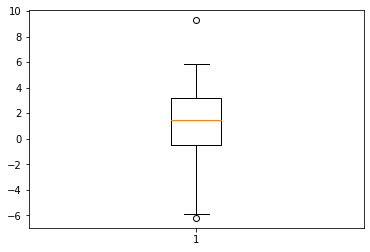

In [9]:
# Boxplot mit der Box zwischen dem 1. und 3. Quarteil und dem roten Strich, wo sich der Median befindet

plt.boxplot(rendite)

Das arithmetische Mittel ist im Gegensatz zum Median empfindlich auf Ausreisser, da der Mittelwert von allen verfügbaren Werten errechnet werd. Er gibt ein präzises Bild der Daten wieder, um auch zukünftie Werte zu schätzen. Das arithmetische Mittel kann aber nur für metrische Daten genutzt werden, nicht für ordinalskalierte Daten.

Das arithmetische Mittel wird berechnet, indem alle verfügbaren Werte addiert werden und dann durch die Anzahl der Werte geteilt wird.

Grundsätzlich könnte man alle Werte mit der Funktion sum() aufsummieren und anschliessend mit der Funktion count() durch die Anzahl Elemente der Liste teilen. Aber da der Mittelwert sehr häufig genutzt wird in der Datenanalyse, existiert eine numpy-Funktion. Mit der Funktion mean() kann der Mittelwert einer Series oder Liste bestimmt werden.

In [10]:
# Arithmetisches Mittel mit sum() / len()

mean_1 = rendite.sum()/rendite.count()

In [11]:
# Arithmetisches Mittel mit mean()

mean_2 = np.mean(rendite)

Wenn man das arithmetische Mittel und den Median bestimmt hat, kann man eine Aussage darüber machen, wie die Funktion etwa aussehen könnte, also ob sie linksschief, symmetrisch oder rechtsschief ist.

Ist der Median grösser als das arithmetische Mittel, ist die Verteilung linksschief. Das bedeutet, die Verteilung steigt von links aus schief an, bis zum Höhepunkt, der rechts des Mittelwertes liegt und fällt dann steil ab.

Ist der Median kleiner als das arithmetische Mittel, ist die Verteilung rechtsschief. Das heisst, die Verteilung steigt von links aus steil an, bis zum Höhepunkt, der links des Mittelwertes liegt und sinkt dann schief ab.

Sind das arithmetische Mittel und der Median etwa gleich, ist die Verteilung symmterisch.

Um die beiden Werte besser zu vergleichen, werden sie nebeneinander mit der Funktion print() ausgegeben. Dabei wird der Mittelwert mit der Funktion round() auf 2 Stellen nach dem Komma gerundet, da diese reichen, um die beiden Zahlen zu vergleichen. Damit die Zahlen schön untereinander stehen, wird mit "\t” ein Tab erzeugt. Mit "\n" wird ein Zeilenumbruch gemacht.

In [12]:
print("Median: \t", median, "\nMittelwert: \t", round(mean_2,2))

Median: 	 1.46 
Mittelwert: 	 1.18


Da der Mittelwert kleiner ist als der Median, wäre die Verteilung der Rendite im Beispiel theoretisch linksschief. Da die Werte aber sehr nahe zusammenliegen, kann man möglicherweise auch von einer symmetrischen Verteilung sprechen. Dies kann mit einem Hist-Plot getestet werden.

Dazu wird zunächst mit der matplotlib-Funktion hist() ein Histogramm der Rendite erstellt. Dabei wird von der matplotlib "geraten", welche Bins man haben möchte. Ansonsten müsste man die Bins als Parameter in Form einer Liste übergeben.
Anschliessend kann man mit der motplotlib-Funktion axvline() den Mittelwert und den Median als eine vertikale Linie im Plot darstellen. Um die Darstellung übersichtlicher zu machen, werden drei verschiedene Farben gewählt. Das Histogramm ist mit "c" auf "Cyan", das arithmetische Mittel ist mit "r" auf "Red" und der Median mit "m" auf "Magenta" gesetzt worden.

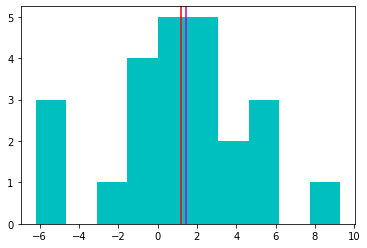

In [13]:
plt.hist(rendite, color="c")
plt.axvline(mean_2, color="r")
plt.axvline(median, color="m")

Das geometrische Mittel wird genutzt, um durchschnittliche Wachstumsraten über die Zeit zu berechnen. In diesem Fall zeigt das geometrische Mittel der diskreten Rendite, wie die Performance des SMI ist.

Das geometrische Mittel wird errechnet, indem man alle Werte multipliziert und nachher die n-te Wurzel des Produktes nimmt. Die n-te Wurzel meint dabei die Anzahl Werte, welche man multipliziert hat.

Wichtig ist dabei zu beachten, dass bei geraden Wurzeln, also beispielsweise die 2. oder 4. Wurzel, keine negative Zahl genommen werden kann. Negative Wurzeln von geraden Zahlen sind im reellen Zahlenraum nicht definiert, da man die Umkehrrechnung nicht machen kann. Also (-1)^2 = 1 -> 2. Wurzel von (-1) gibt es nicht.

Bei den Renditen nimmt man nicht die Prozentzahlen, sondern den Wachstumsfaktor. Dieser addiert 1 mit der Dezimalzahl des jeweiligen Renditewert. Also aus 3.41% wird dann 1 + 0.0341 = 1.0341. Dies führt dazu, dass das Produkt nie negativ wird, da bei einer negativen Rendite, der Wert einfach unter 1, aber nicht unter 0 sein wird.

Um das geometrische Mittel zu bestimmen, müssen zuerst alle Werte aus der Rendite-Series in den Wachstumsfaktor umgewandelt werden. Dazu werden die Werte mit 100 addiert und anschliessend durch 100 geteilt. Alternativ hätte man auch die Rendite-Werte zuerst durch 100 teilen können und anschliessend mit 1 addieren.

Damit alle Werte aufmultipliziert werden können, wird eine for-Schleife genutzt. Anschliessend wird das Produkt hoch 1 durch die Anzahl Werte gerechnet. Diese Hochrechnung entspricht der n-ten Wurzel und wird mit ** in Python umgesetzt. Anschliessend wird der errechnete Wert noch -1 gerechnet.

In [14]:
geom_product = 1
for ren in rendite:
    geom_product *= (100+ren)/100

geom_mean_1 = geom_product**(1/rendite.count())-1
round(geom_mean_1*100,2)

1.12

Eine weitere Möglichkeit, um das Wachstum über die Zeit zu bestimmen, ist es, wenn man den ersten und den letzten Abschlusswert dividiert und dann die n-te Wurzel des Ergebnisses nimmt. Dabei entspricht n den Anzahl Werten, welche dazwischen liegen. n ist aber in diesem Fall 1 kleiner als die Länge der Liste.

In [15]:
geom_mean_2 = (12161.53/9629.40)**(1/(rendite.count()-1))-1
round(geom_mean_2*100,2)

1.02

Grundsätzlich sollten die beiden Werte übereinstimmen. Der Grund, warum dies nicht der Fall ist, liegt daran, dass der erste Rendite-Wert 3.41 durch den Schlusswert vom 01.03.2020 errechnet wird. Der Wert ist aber unbekannt, da sich die Eröffnungs- und Zuletzt-Werte unterschieden.

Daher könnte man bei der Errechnung des geometrischen Mittels beispielsweise alle Werte nehmen, ausser dem Rendite-Wert vom 01.04.2020. Dann würde man den gleichen Wert bekommen.

In [16]:
geom_product = 1
for ren in rendite[:-1]:
    geom_product *= (100+ren)/100

geom_mean_3 = geom_product**(1/(rendite.count()-1))-1
round(geom_mean_3*100,2)

1.02

In [17]:
np.std(rendite) # Standardabweichung von Renditen

3.5673641987311706

### Monte Carlo Simulation 1. Möglichkeit (nur 1 Wert)

In [18]:
# Calculate the daily returns and volatility of the stock
daily_returns = df['Zuletzt'].pct_change() #Prozentuale Unterscheid zwische allen Werten im Array
daily_volatility = daily_returns.std() # Tägliche Standardabweichung der Prozentualen Unterscchieden

print(daily_volatility)

trading_days = 252 #wie viele Tage voraussimulieren
count = 0 #Counter setzen
price_list = [] #Array der Simulierten Preise in welcher wir die Daten speichern
last_price = df['Zuletzt'].values[-1] #letzter Preis der Spalte zuletzt

price = last_price * (1 + np.random.normal(0, daily_volatility)) #um den Preis zu simulieren wird eine Random Zahl generiert und mit dem letzten Preis multipliziert
price_list.append(price) #asugerechnete Werte werden der Price list hinzugefügt

for y in range(trading_days): #For Schleife für die zu ermittelnenden 365 Tage
    if count == 364: #Abbruchbedingung wenn Counter bei 364 (zu beachten dass hier 364 stehen muss weil 0-364=365)
        break #Schleife verlassen
    price = price_list[count]* (1 + np.random.normal(0, daily_volatility)) #neue Random Zahl jeweils aus dem jeweils nächsten Wert der Liste
    price_list.append(price) #Wert der Liste hinzufügen
    count += 1 # Counter + 1

0.03656140173606139


Bei mehrmaliger Ausführung werden immer andere Graphen erfolgen. Mittels genügend Graphen kann ein Mittelwert ermittelt werden und Auskunft über eine mögliche Investition geben.

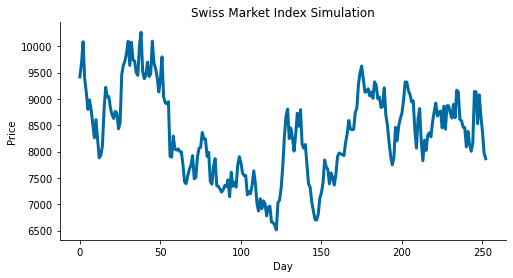

In [19]:
fig,ax = plt.subplots(figsize=(8,4)) # Subplot definieren um das Diagramm geeignet darzustllen 
ax.spines[['top','right']].set_visible(False)
ax.plot(price_list,color='#006BA2',linewidth=3) # Farbe setzen und Breite der Linie
plt.xlabel('Day') # x-Achse beschriften
plt.ylabel('Price') # y-Achse beschriften
plt.title('Swiss Market Index Simulation') # Titel setzen
plt.show() # Diagramm anzeigen

### Monte Carlo Simulation 2. Möglichkeit (mehrere Werte)

Für die Monte Carlo Simulation werden idealerweise die täglichen und nicht die monatlichen Daten des SMI genutzt. Diese können über die Yahoo Finance Source abgerufen werden. Dies kann entweder mithilfe der pandas_datareader-Library erfolgen. Dazu wird ein neues DataFrame erstellt. Der SMI ist bei YahooFinance über die Benennung "^SSMI" erhältlich. Dann kann man ein Start- und ein End-Datum wählen. Das Start-Datum wurde willkürlich auf den 1.8.2018 gesetzt. Das Schlussdatum soll der heutige Tag sein. Dazu wird die Library "datetime" genutzt. Mit der Funktion today() wird der heutige Tag im gewünschten Format gesucht wird.

In [32]:
# Für die Monte Carlo Simulation werden die täglichen Daten geladen
# Dazu wird Yahoo Finance als Source verwendet. 

start_date = "2019-08-01"
end_date = datetime.today().strftime("%Y-%m-%d")

df_MC = yf.download("^SSMI", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Um den Startwert zu bestimmen, wird der neuste Schluss-Wert in der Variablen last_price gespeichert. Das es sich um den letzten Wert der Liste handelt, wird mit [-1] angezeigt.

Anschliessend wird noch die tägliche Volatilität berechnet, indem die Standardabweichung der Rendite genommen wird. Die Rendite errechnet sich aus den prozentualen Änderungen der Schluss-Werte. Dies kann mit der Funktion pct_change() gemacht werden. Anschliessend kann mit der Funktion std() die Standardabweichung bestimmt werden.

Die tägliche Volatilität wird gebraucht, um zu ermitteln, wie sehr ein folgender Wert vom bekannten Wert abweichen kann. So kann man mit dem neusten Schluss-Wert (last_price) und der Volatilität (daily_vol) versuchen eine Voraussage zu treffen, wie sich der SMI in Zukunft entwickeln könnte.

In [25]:
last_price = df_MC["Adj Close"][-1]
last_price

11484.900390625

In [26]:
daily_vol = df_MC["Adj Close"].pct_change().std()
daily_vol

0.010641081432845381

Für die Simulation muss festgelegt werden, wie viele verschiedene Simulationen gemacht und für wie viele Tage mögliche Werte errechnet werden sollen. Dabei wird die Anzahl Tage auf 252 gelegt, da dies unter Berücksichtigung von Wochenenden und Feiertagen, einem Bankenjahr entspricht.

In [27]:
num_simulation = 100 # gibt an, wie viele Simulationen erstellt werden
num_days = 252 # gibt an, für wie viele Tage die Simulation erstellt wird, 252 entspricht einem Banken-Jahr

Für die Simulation selber wird ein neues DateFrame (simulation_df) erstellt, in dem die errechneten Werte pro Simulation gespeichert werden sollen. Ausserdem wird eine neue leere Liste (price_series) definiert, wo die errechneten Werte des Tages gespeichert werden.

In der äusseren for-Schleife wird vor jedem Durchgang sichergestellt, dass die Liste leer ist. Dazu wird die Funktion clear() verwendet. Zu Beginn wird der letzte reale Preis der Variablen price übergeben.

In der inneren for-Schleife wird zunächst der Preis berechnet. Die Berechnung erfolgt mit dem letzten Wert, welcher der Variablen price zugeordnet wurde. Zu Beginn also dem letzten realen Wert und anschliessend dem letzten simulierten Wert. Dieser letzte Wert wird mit einem normalverteilten zufälligen Wachstumsfaktor multipliziert. Der Prozent-Wert dieses Wachstumsfaktors setzt sich aus einer normalverteilten Zufallszahl zusammen, welche zwischen 0 und der vorgängig errechneten Volatilität liegen soll. Das Produkt wird anschliessend der price_series-Liste zugefügt. Dazu wird die Funktion append() verwendet.

Anschliessend wird in der äusseren Schleife die price_series-Liste dem DataFram simulation_df zugefügt. Somit hat man am Ende ein DataFrame mit so vielen Spalten, wie man Simulationen durchgeführt hat und so vielen Zeilen, wie die Anzahl Tage, die man simulieren wollte.

In [28]:
simulation_df = pd.DataFrame()
price_series = []

for i in range(num_simulation):
    price_series.clear()
    price = last_price
    
    for x in range(num_days):
        price = price*(1+np.random.normal(0,daily_vol))
        price_series.append(price)
    
    simulation_df[i]=price_series

In [29]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,11235.806853,11604.844283,11399.915775,11395.280073,11509.087060,11638.721258,11558.599567,11716.539035,11314.216735,11605.118782,...,11240.191865,11404.994939,11348.780275,11464.310655,11640.669202,11436.926360,11471.060694,11573.268529,11640.307265,11632.785144
1,11501.596330,11573.852652,11412.400780,11496.371084,11653.439321,11549.473175,11545.599120,11631.619806,11110.410850,11734.140011,...,10965.510084,11493.352474,11303.618021,11422.829013,11670.684575,11478.322663,11575.813403,11512.594873,11731.144675,11636.403117
2,11736.797396,11705.460536,11486.138176,11469.367724,11704.162020,11493.668169,11625.911413,11494.980175,10958.636594,11682.146930,...,11129.339674,11538.976704,11255.874279,11486.418676,11552.016337,11412.296678,11668.044768,11456.372781,11555.785130,11709.427235
3,11759.033907,11680.383654,11300.155437,11586.947743,11539.354876,11456.743019,11447.910489,11327.763232,10856.822782,11965.010907,...,11114.946041,11525.297952,11266.007893,11389.518445,11656.486543,11762.010032,11686.177571,11290.859407,11465.585938,11603.916641
4,11750.652778,11688.615636,11144.116633,11714.881892,11536.600815,11607.109548,11282.880214,11239.975455,10674.202984,12276.065889,...,11238.900936,11463.677441,11211.059346,11465.430086,11444.619844,11871.253089,11806.397120,11108.070045,11533.920805,11696.424563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,8483.583230,11622.799284,8414.925963,13080.645387,12299.531345,13419.908117,8157.860394,13714.334953,13347.516434,12043.307385,...,10227.203904,14555.653709,11806.751989,14245.718673,11934.075335,10192.613005,11589.384906,11395.944366,10459.972132,12418.036350
248,8506.930888,11709.559549,8458.904777,12919.162281,12283.601219,13458.704849,8311.061319,13537.057591,13493.257844,12203.806207,...,10285.822927,14681.666670,11722.655579,14343.581145,12063.348584,10226.575857,11703.574409,11345.003319,10447.995359,12448.903808
249,8694.689674,11730.720255,8481.737903,13047.804308,12067.885019,13604.409268,8333.261409,13573.676299,13138.058957,12106.241575,...,10270.590144,14870.704643,12194.922349,14339.299495,11740.218105,10386.610392,11930.583427,11441.630475,10388.834200,12380.355716
250,8630.126207,11929.365435,8453.404465,13100.538360,12012.548335,13455.401857,8214.504624,13695.975857,12934.119169,12284.114959,...,10191.207613,14905.774972,11899.407570,14236.328776,11712.421095,10359.534531,11982.994921,11705.253769,10359.692237,12487.471930


Um das simulierte DataFrame zu plotten wird zunächst mit der Funktion figure() definiert, wie gross die Grafik sein soll. Anschliessend wird mit plot() ein Liniendiagramm mit dem gesamten DataFrame erstellt. Damit man den letzten Preis als Hinweis dargestellt hat, wird mit der Funktion axhline() festgelegt, dass der letzte Preis über die ganze Grafik hinweg als rote Linie dargestellt wird.

Dort, wo die Simulation am dichtesten ist, ist die Wahrscheinlichkeit am grössten, dass die zukünftigen Werte liegen werden.

Text(0.5, 1.0, 'Swiss Market Index Simulation')

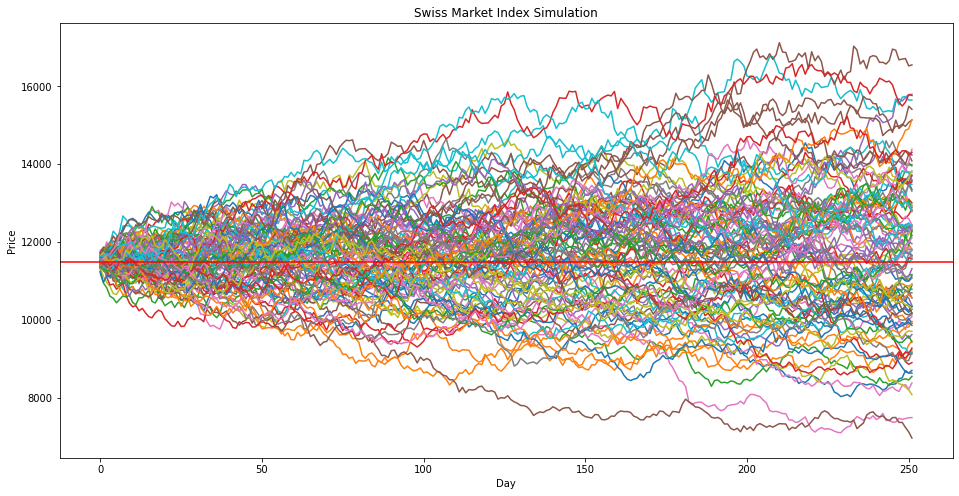

In [30]:
plt.figure(figsize=(16,8))
plt.plot(simulation_df)
plt.axhline(last_price, color="r")
plt.xlabel('Day') # x-Achse beschriften
plt.ylabel('Price') # y-Achse beschriften
plt.title('Swiss Market Index Simulation') # Titel setzen